In [1]:
import pandas as pd 
import sklearn
import seaborn as sea
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
import warnings
warnings.filterwarnings('ignore')

## Load in the data

In [2]:
house_prices_train = pd.read_csv('train.csv')
house_prices_test = pd.read_csv('test.csv')
house_prices_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
house_prices_all = pd.concat((house_prices_train.loc[:,'MSSubClass':'SaleCondition'], 
                              house_prices_test.loc[:,'MSSubClass':'SaleCondition']))
house_prices_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [4]:
house_prices_train.shape, house_prices_test.shape, house_prices_all.shape

((1460, 81), (1459, 80), (2919, 79))

#### Check column datatypes

In [5]:
pd.options.display.max_rows = 100
house_prices_all.get_dtype_counts()

float64    11
int64      25
object     43
dtype: int64

## Exploratory Data Analysis

#### Summary statistics

In [6]:
house_prices_all.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


#### Explore the output variable

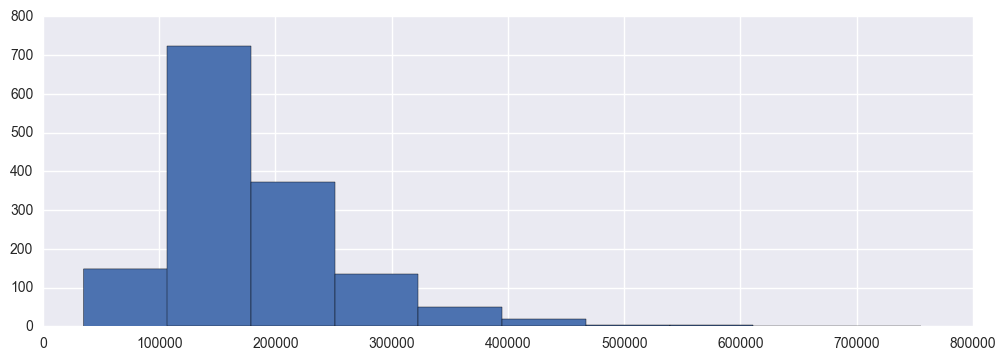

In [7]:
plot = house_prices_train['SalePrice'].hist()

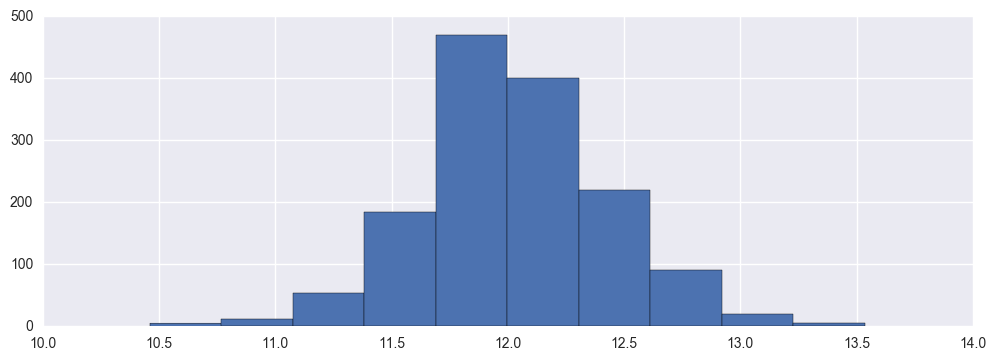

In [8]:
plot = house_prices_train['SalePrice'].apply(lambda x: np.log1p(x)).hist()

In [9]:
print stats.skew(house_prices_train['SalePrice'])
print stats.skew(house_prices_train['SalePrice'].apply(lambda x: np.log1p(x)))

1.88094074603
0.121221913115


#### Since the output variable is skewed, lets log transform it so it is closer to normal distribution

In [10]:
house_prices_train['log_SalePrice'] = house_prices_train['SalePrice'].apply(lambda x: np.log1p(x))
house_prices_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247699


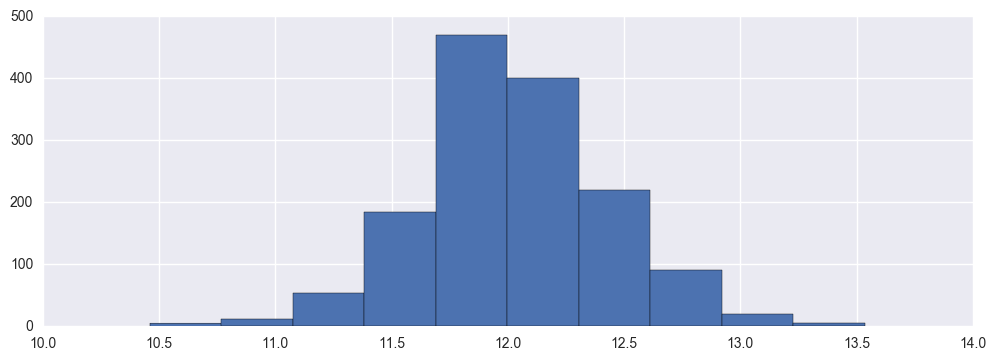

In [11]:
plot = house_prices_train['log_SalePrice'].hist() #Looks pretty normal!
#plot = sea.boxplot(house_prices_train['log_SalePrice'])

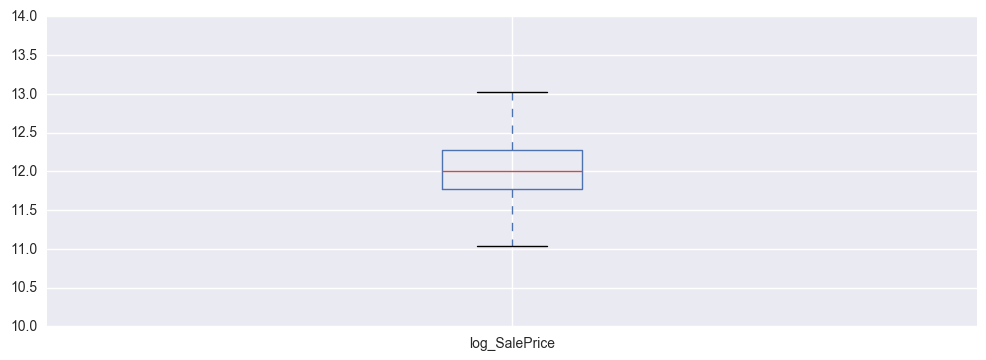

In [12]:
plot = house_prices_train.boxplot(column='log_SalePrice')

#### Replace NaNs with means of the columns

In [13]:
house_prices_all = house_prices_all.fillna(house_prices_all.mean())

#### Lets look at what features are skewed and log transform them if necessary

In [14]:
numerical_features = house_prices_all.columns[house_prices_all.dtypes != 'object']
stats.skew(house_prices_all[numerical_features])

array([  1.37545736,   1.64557379,  12.8224314 ,   0.19711045,
         0.57031205,  -0.59980555,  -0.45102038,   2.61154938,
         1.42523344,   4.14603364,   0.91950831,   1.16248375,
         1.46960442,   0.86167475,  12.088761  ,   1.26935769,
         0.62395504,   3.93134301,   0.16760573,   0.69456649,
         0.32632435,   4.30225437,   0.75836691,   0.7334946 ,
        -0.39279   ,  -0.21829789,   0.24121778,   1.84243281,
         2.53511373,   4.00389122,  11.37606468,   3.9466937 ,
        16.89832792,  21.94719481,   0.19588394,   0.13239881])

In [15]:
skewed_features = house_prices_all[numerical_features].columns[np.absolute(stats.skew(house_prices_all[numerical_features]))>0.8]
print skewed_features
house_prices_all[skewed_features] = house_prices_all[skewed_features].apply(lambda x: np.log1p(x))
house_prices_all.head(2)

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'MasVnrArea', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea', u'BsmtHalfBath', u'KitchenAbvGr',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
       u'ScreenPorch', u'PoolArea', u'MiscVal'],
      dtype='object')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal


In [16]:
print house_prices_all[numerical_features].columns[np.absolute(stats.skew(house_prices_all[numerical_features]))>0.8]
skewed_features = house_prices_all[numerical_features].columns[np.absolute(stats.skew(house_prices_all[numerical_features]))>0.8]

Index([u'LotFrontage', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'LowQualFinSF', u'BsmtHalfBath', u'KitchenAbvGr', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal'],
      dtype='object')


#### *It looks like some features are still skewed looking at above ... might need to look into it later!*

#### One hot encoding for categorical variables

In [17]:
pd.set_option('display.max_columns', 300)
house_prices_all = pd.get_dummies(house_prices_all)
house_prices_all.head(1)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Garage

In [18]:
house_prices_all.shape #as we can see, we have 288 features now from 79.

(2919, 288)

## Modeling

#### Split the dataframe into its original train and test with all the data transformation intact

In [19]:
train = house_prices_all[0:len(house_prices_train)]
test = house_prices_all[len(house_prices_train):]
output = house_prices_train['log_SalePrice']
print len(train), len(test), len(house_prices_all), len(output)

1460 1459 2919 1460


In [20]:
train.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Garage

In [21]:
train.to_csv('train_log_noskew.csv', index=False)
test.to_csv('test_log_noskew.csv', index=False)

In [20]:
train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,Garage

### Lets start with simple linear regression

In [42]:
def modelfit(model, dtrain, features, output, validation, validation_output, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    model.fit(dtrain[features], output)
        
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[features])
    validation_predictions = model.predict(validation[features])

    
    #Perform cross-validation:
    from sklearn import cross_validation
    from sklearn import metrics
    if performCV:
        cv_score = cross_validation.cross_val_score(model, dtrain[features], output, cv=cv_folds)
    
    #Print model report:
    print "\nModel Report"
    print "Training R-Square: %.3f" % metrics.r2_score(output, dtrain_predictions)
    print "Training RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(output, dtrain_predictions))    
    print "Validation R-Square: %.3f" % metrics.r2_score(validation_output, validation_predictions)
    print "Validation RMSE : %.3f" % np.sqrt(metrics.mean_squared_error(validation_output, validation_predictions))
    print('Variance score: %.2f' % model.score(validation, validation_output))
    if model != linreg:
        print('Optimal Alpha: %.4f') %model.alpha_ 
    
    if performCV:
        print"Training cv_score: "
        print(cv_score)
        print "CV Score : Mean: %.7g | Std: %.7g | Min: %.7g | Max: %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    if printFeatureImportance:
        df = {'features': features.values, 'Coefficients': model.coef_}
        coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
        plt.figure()
        coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
        plt.ylabel('Feature Coefs')
        plt.figure()
        coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
        plt.ylabel('Feature Coefs')

In [28]:
from sklearn import linear_model
linreg = linear_model.LinearRegression(fit_intercept=True)

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, output, test_size=0.2, random_state=37)

In [31]:
features = X_train.columns
modelfit(linreg, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=False)


Model Report
Training R-Square: 0.956
Training RMSE : 0.085
Validation R-Square: 0.798
Validation RMSE : 0.171
Variance score: 0.80
Training cv_score: 
[  0.83588826 -13.67797663   0.89657141   0.86489822   0.90755555]
CV Score : Mean: -2.034613 | Std: 5.821736 | Min: -13.67798 | Max: 0.9075555


In [33]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': linreg.coef_}
linreg_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
linreg_coefficients

,Coefficients,features
32,4.532373,PoolArea
15,0.447417,GrLivArea
249,0.361014,GarageQual_Ex
100,0.347345,Condition2_PosA
269,0.239245,MiscFeature_Gar2
287,0.209095,SaleCondition_Partial
180,0.201461,Foundation_Stone
123,0.156663,RoofStyle_Shed
191,0.135640,BsmtExposure_Gd
126,0.134905,RoofMatl_Membran


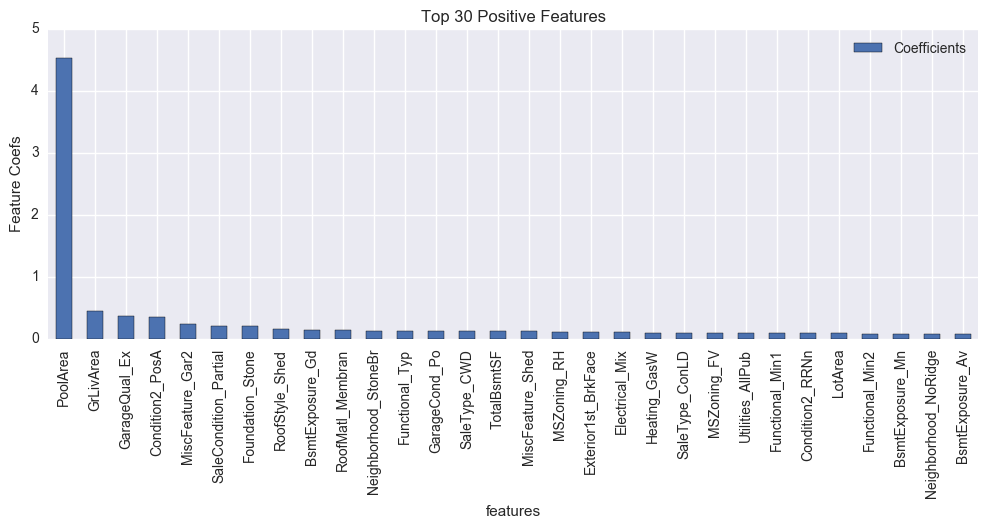

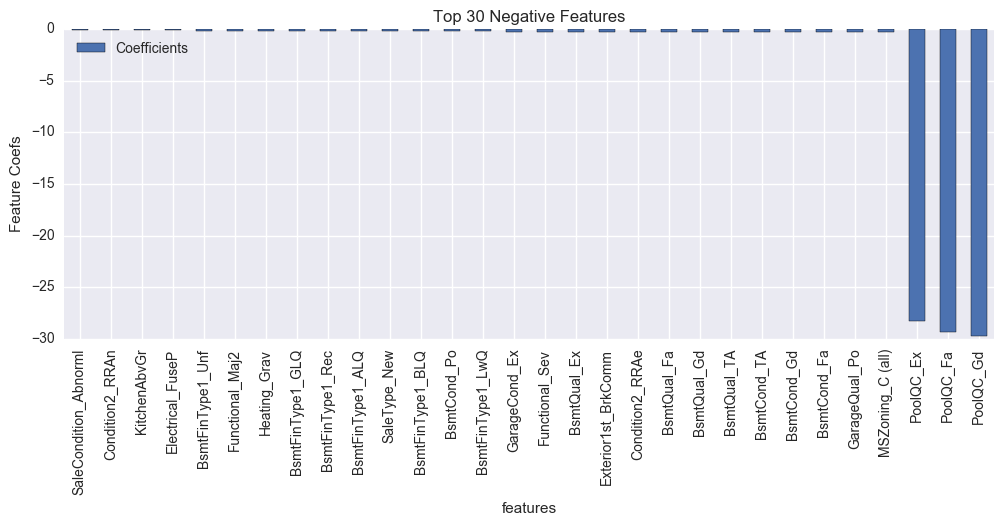

In [36]:
plt.figure()
linreg_coefficients.iloc[0:30].plot(x=['features'], kind='bar', title='Top 30 Positive Features')
plt.ylabel('Feature Coefs')
plt.figure()
linreg_coefficients.iloc[-30:].plot(x=['features'], kind='bar', title='Top 30 Negative Features')
plt.ylabel('Feature Coefs')

Above doesn't make a whole lot of sense!!!

### Ridge Regression

In [38]:
alpha = np.arange(0.01,10,0.05)
print alpha

[ 0.01  0.06  0.11  0.16  0.21  0.26  0.31  0.36  0.41  0.46  0.51  0.56
  0.61  0.66  0.71  0.76  0.81  0.86  0.91  0.96  1.01  1.06  1.11  1.16
  1.21  1.26  1.31  1.36  1.41  1.46  1.51  1.56  1.61  1.66  1.71  1.76
  1.81  1.86  1.91  1.96  2.01  2.06  2.11  2.16  2.21  2.26  2.31  2.36
  2.41  2.46  2.51  2.56  2.61  2.66  2.71  2.76  2.81  2.86  2.91  2.96
  3.01  3.06  3.11  3.16  3.21  3.26  3.31  3.36  3.41  3.46  3.51  3.56
  3.61  3.66  3.71  3.76  3.81  3.86  3.91  3.96  4.01  4.06  4.11  4.16
  4.21  4.26  4.31  4.36  4.41  4.46  4.51  4.56  4.61  4.66  4.71  4.76
  4.81  4.86  4.91  4.96  5.01  5.06  5.11  5.16  5.21  5.26  5.31  5.36
  5.41  5.46  5.51  5.56  5.61  5.66  5.71  5.76  5.81  5.86  5.91  5.96
  6.01  6.06  6.11  6.16  6.21  6.26  6.31  6.36  6.41  6.46  6.51  6.56
  6.61  6.66  6.71  6.76  6.81  6.86  6.91  6.96  7.01  7.06  7.11  7.16
  7.21  7.26  7.31  7.36  7.41  7.46  7.51  7.56  7.61  7.66  7.71  7.76
  7.81  7.86  7.91  7.96  8.01  8.06  8.11  8.16  8

In [39]:
ridge = linear_model.RidgeCV(alphas=alpha, fit_intercept=True)


Model Report
Training R-Square: 0.942
Training RMSE : 0.097
Validation R-Square: 0.868
Validation RMSE : 0.138
Variance score: 0.87
Optimal Alpha: 5.3100
Training cv_score: 
[ 0.83799582  0.91911208  0.91064395  0.89755943  0.92926877]
CV Score : Mean: 0.898916 | Std: 0.03218641 | Min: 0.8379958 | Max: 0.9292688


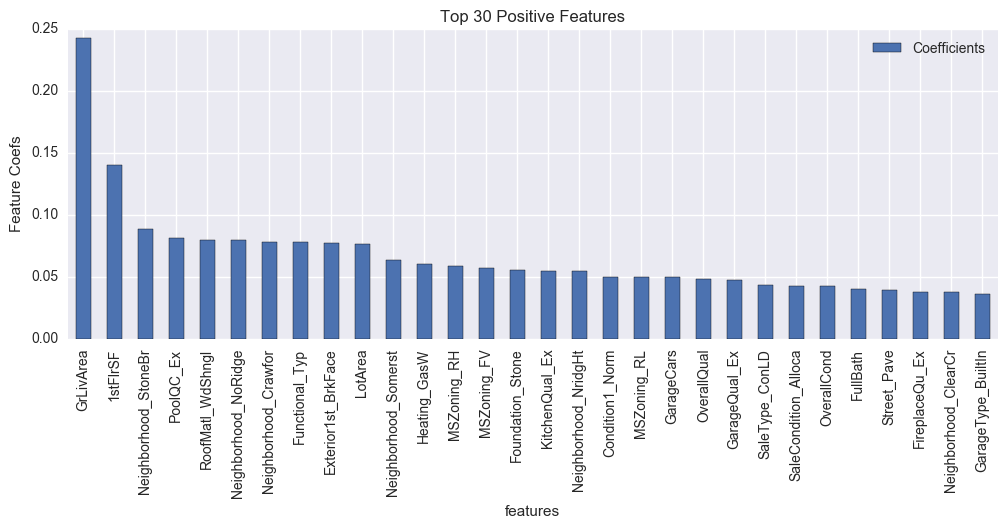

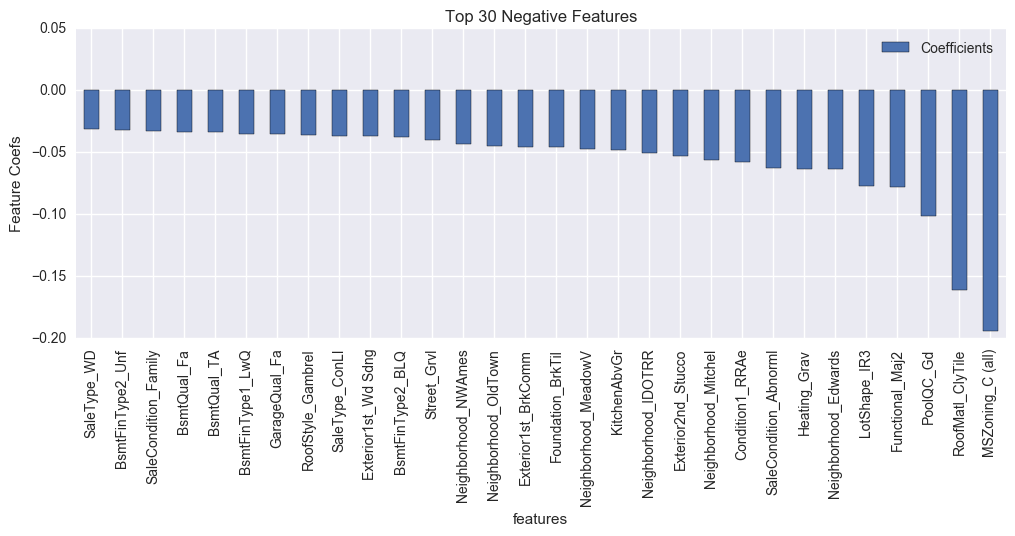

In [43]:
modelfit(ridge, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=True)

In [44]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': ridge.coef_}
ridge_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
ridge_coefficients

,Coefficients,features
15,0.242775,GrLivArea
12,0.139820,1stFlrSF
85,0.088783,Neighborhood_StoneBr
262,0.081399,PoolQC_Ex
131,0.079857,RoofMatl_WdShngl
78,0.079370,Neighborhood_NoRidge
69,0.078244,Neighborhood_Crawfor
234,0.077912,Functional_Typ
135,0.077569,Exterior1st_BrkFace
2,0.076398,LotArea


#### Above makes a lot more sense compared to simple linear regression ... GrLivArea (Above Ground Living Area) and 1stFlrSF (First floor sq feet) certainly seem important and should have positive coefficients. Can't say the same about the features with strong negative coefficients though

#### Error metrics certainly look better than for Linear Regression!!!

In [46]:
ridge_prediction = np.exp(ridge.predict(test))-1
ridge_prediction

array([ 122685.34977004,  154970.19164194,  181965.43083634, ...,
        165346.36786529,  116474.44537217,  218611.25832778])

In [47]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': ridge_prediction})
df.head(5)

,Id,SalePrice
0,1461,122685.349770
1,1462,154970.191642
2,1463,181965.430836
3,1464,197033.297177
4,1465,199286.734973


In [48]:
#df.to_csv('kaggle_submission_ridge_12102016_1721.csv', index=False)

### Lets try Lasso

In [63]:
alpha = np.arange(0.0001,0.0009,0.00001)

In [57]:
lasso = linear_model.LassoCV(fit_intercept=True, alphas=alpha)


Model Report
Training R-Square: 0.943
Training RMSE : 0.096
Validation R-Square: 0.878
Validation RMSE : 0.133
Variance score: 0.88
Optimal Alpha: 0.0004
Training cv_score: 
[ 0.84856647  0.92559949  0.92106331  0.90067843  0.9331423 ]
CV Score : Mean: 0.90581 | Std: 0.03057612 | Min: 0.8485665 | Max: 0.9331423


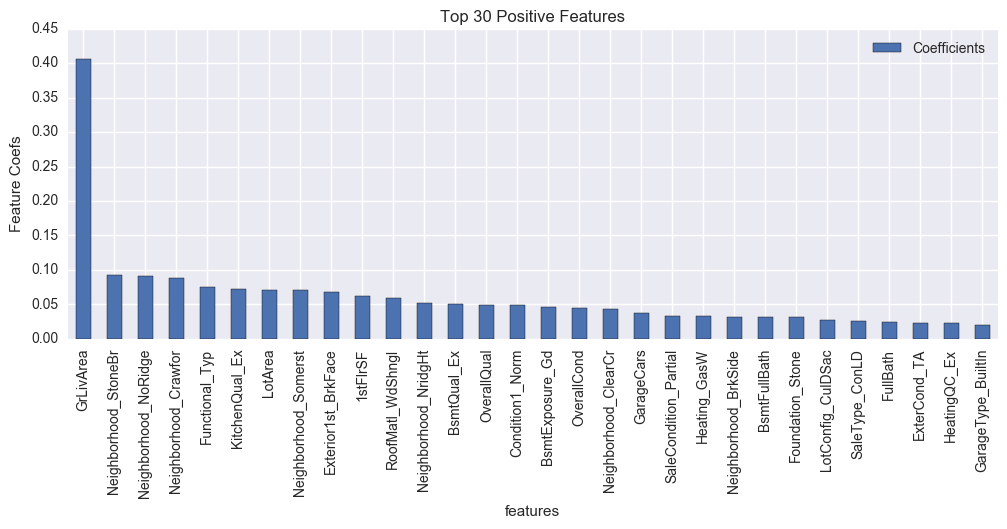

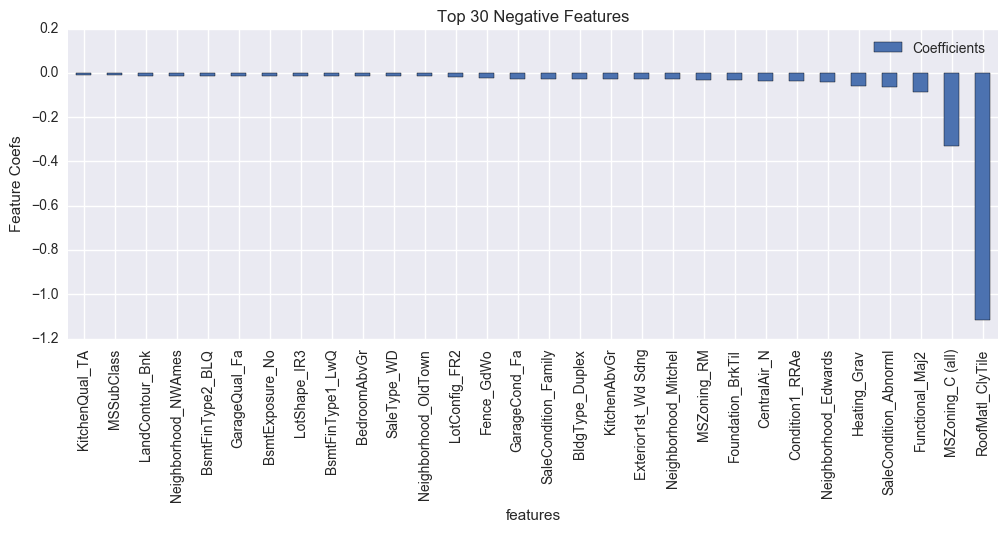

In [58]:
modelfit(lasso, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=True)

In [59]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': lasso.coef_}
lasso_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
lasso_coefficients

,Coefficients,features
15,0.405592,GrLivArea
85,0.093376,Neighborhood_StoneBr
78,0.090522,Neighborhood_NoRidge
69,0.087654,Neighborhood_Crawfor
234,0.074533,Functional_Typ
224,0.072632,KitchenQual_Ex
2,0.071498,LotArea
84,0.071042,Neighborhood_Somerst
135,0.067274,Exterior1st_BrkFace
12,0.062113,1stFlrSF


#### Lasso looks to have performed slightly better than ridge!

In [60]:
non_zero_lasso_coef = lasso_coefficients[lasso_coefficients['Coefficients']!=0]['features']
non_zero_lasso_coef

15                 GrLivArea
85      Neighborhood_StoneBr
78      Neighborhood_NoRidge
69      Neighborhood_Crawfor
234           Functional_Typ
224           KitchenQual_Ex
2                    LotArea
84      Neighborhood_Somerst
135      Exterior1st_BrkFace
12                  1stFlrSF
131         RoofMatl_WdShngl
79      Neighborhood_NridgHt
182              BsmtQual_Ex
3                OverallQual
90           Condition1_Norm
191          BsmtExposure_Gd
4                OverallCond
67      Neighborhood_ClearCr
25                GarageCars
287    SaleCondition_Partial
208             Heating_GasW
66      Neighborhood_BrkSide
16              BsmtFullBath
180         Foundation_Stone
56         LotConfig_CulDSac
276           SaleType_ConLD
18                  FullBath
175             ExterCond_TA
212             HeatingQC_Ex
243       GarageType_BuiltIn
23                Fireplaces
161      Exterior2nd_Wd Sdng
11               TotalBsmtSF
105            BldgType_1Fam
245        Gar

### Lets use non-zero Lasso coefficients to run Ridge regression

In [61]:
train[non_zero_lasso_coef].head(1)

,GrLivArea,Neighborhood_StoneBr,Neighborhood_NoRidge,Neighborhood_Crawfor,Functional_Typ,KitchenQual_Ex,LotArea,Neighborhood_Somerst,Exterior1st_BrkFace,1stFlrSF,RoofMatl_WdShngl,Neighborhood_NridgHt,BsmtQual_Ex,OverallQual,Condition1_Norm,BsmtExposure_Gd,OverallCond,Neighborhood_ClearCr,GarageCars,SaleCondition_Partial,Heating_GasW,Neighborhood_BrkSide,BsmtFullBath,Foundation_Stone,LotConfig_CulDSac,SaleType_ConLD,FullBath,ExterCond_TA,HeatingQC_Ex,GarageType_BuiltIn,Fireplaces,Exterior2nd_Wd Sdng,TotalBsmtSF,BldgType_1Fam,GarageType_Detchd,HalfBath,LotConfig_Corner,GarageType_Attchd,Exterior1st_MetalSd,Foundation_PConc,ScreenPorch,LotShape_Reg,PoolArea,PavedDrive_Y,BsmtFinSF1,LandSlope_Mod,FireplaceQu_Gd,Fence_MnPrv,Functional_Min2,Exterior2nd_VinylSd,TotRmsAbvGrd,WoodDeckSF,EnclosedPorch,FireplaceQu_Ex,GarageQual_Gd,YearBuilt,OpenPorchSF,YearRemodAdd,GarageYrBlt,Exterior2nd_MetalSd,GarageArea,MasVnrArea,LowQualFinSF,Functional_Maj1,ExterCond_Fa,BsmtFinType1_BLQ,MoSold,BsmtFinSF2,MiscVal,2ndFlrSF,Neighborhood_MeadowV,BsmtUnfSF,Neighborhood_NAmes,Alley_Grvl,FireplaceQu_Fa,HouseStyle_2Story,YrSold,Exterior2nd_Plywood,HeatingQC_TA,Condition1_Artery,ExterQual_TA,Neighborhood_Timber,BsmtQual_TA,KitchenQual_TA,MSSubClass,LandContour_Bnk,Neighborhood_NWAmes,BsmtFinType2_BLQ,GarageQual_Fa,BsmtExposure_No,LotShape_IR3,BsmtFinType1_LwQ,BedroomAbvGr,SaleType_WD,Neighborhood_OldTown,LotConfig_FR2,Fence_GdWo,GarageCond_Fa,SaleCondition_Family,BldgType_Duplex,KitchenAbvGr,Exterior1st_Wd Sdng,Neighborhood_Mitchel,MSZoning_RM,Foundation_BrkTil,CentralAir_N,Condition1_RRAe,Neighborhood_Edwards,Heating_Grav,SaleCondition_Abnorml,Functional_Maj2,MSZoning_C (all),RoofMatl_ClyTile
0,7.444833,0,0,0,1,0,9.04204,0,0,6.753438,0,0,0,7,1,0,5,0,2.0,0,0,0,1.0,0,0,0,2,1,1,0,0,0,6.753438,1,0,1,0,1,0,1,0.0,1,0.0,1,6.561031,0,0,0,0,1,8,0.0,0.0,0,0,2003,4.127134,2003,2003.0,0,548.0,5.283204,0.0,0,0,0,2,0.0,0.0,6.751101,0,5.01728,0,0,0,1,2008,0,0,0,0,0,0,0,4.110874,0,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0.693147,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
X_train, X_test, y_train, y_test = train_test_split(train[non_zero_lasso_coef], output, test_size=0.2, random_state=37)

In [84]:
alpha = np.arange(0.0001,0.0011,0.00001)

In [85]:
ridge = linear_model.RidgeCV(alphas=alpha, fit_intercept=True)
features = train[non_zero_lasso_coef].columns


Model Report
Training R-Square: 0.948
Training RMSE : 0.092
Validation R-Square: 0.872
Validation RMSE : 0.136
Variance score: 0.87
Optimal Alpha: 0.0001
Training cv_score: 
[ 0.85470386  0.93987255  0.92928174  0.91105024  0.93458848]
CV Score : Mean: 0.9138994 | Std: 0.0311496 | Min: 0.8547039 | Max: 0.9398726


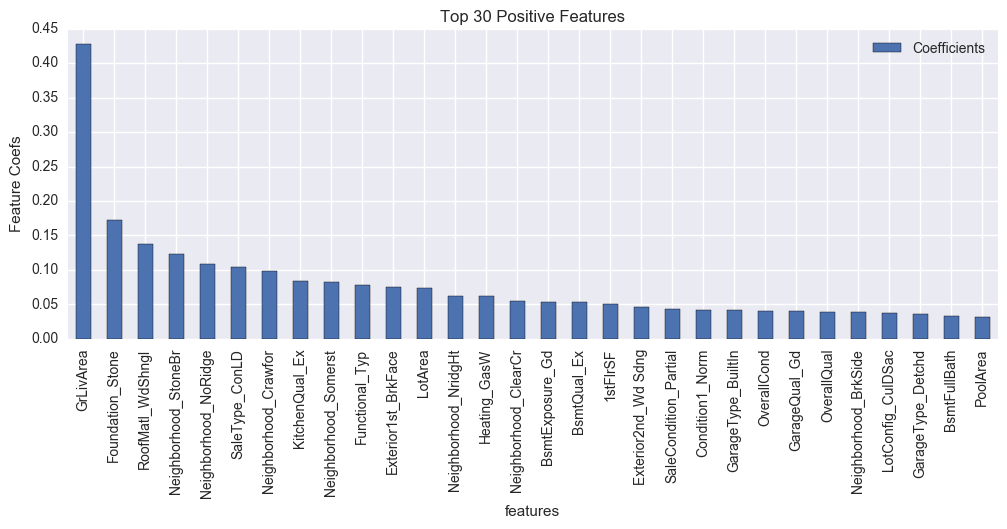

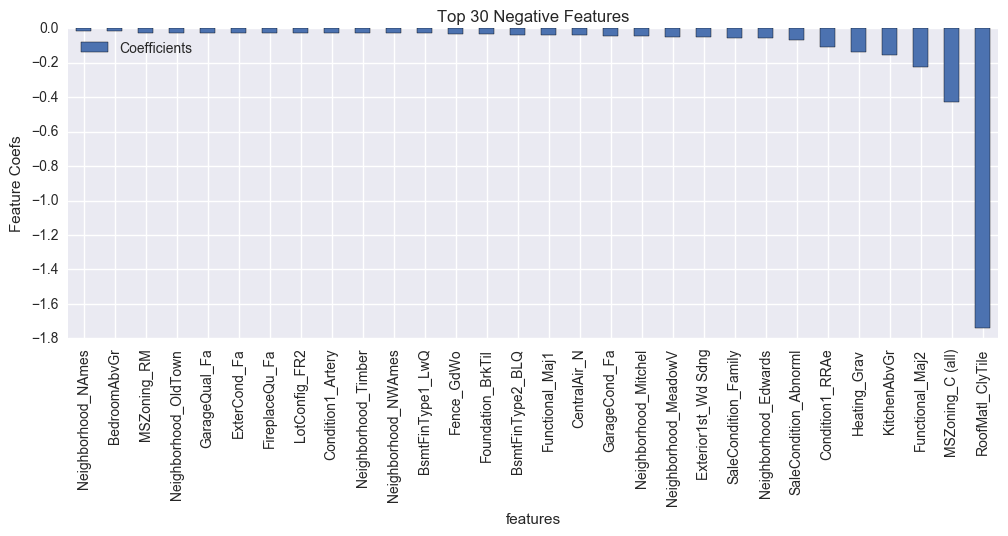

In [86]:
modelfit(ridge, X_train, features, y_train, X_test, y_test, performCV=True, printFeatureImportance=True)

In [87]:
# The coefficients
df = {'features': X_train.columns, 'Coefficients': ridge.coef_}
ridge_coefficients = pd.DataFrame(df).sort_values(by='Coefficients', ascending=False)
ridge_coefficients

,Coefficients,features
0,0.428112,GrLivArea
23,0.172150,Foundation_Stone
10,0.136944,RoofMatl_WdShngl
1,0.123850,Neighborhood_StoneBr
2,0.108258,Neighborhood_NoRidge
25,0.103670,SaleType_ConLD
3,0.098051,Neighborhood_Crawfor
5,0.083887,KitchenQual_Ex
7,0.082216,Neighborhood_Somerst
4,0.078789,Functional_Typ


### Lets submit the results to kaggle

Lets ensemble ridge with lasso coefficients and lasso only

In [70]:
prediction = np.expm1(ridge.predict(test[non_zero_lasso_coef]) * 0.5 + 0.5 * lasso.predict(test))
prediction

array([ 123104.25486955,  153077.32891985,  181663.32516336, ...,
        164069.00296668,  114914.05010229,  218408.07645914])

In [71]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': prediction})
df.head(5)

,Id,SalePrice
0,1461,123104.254870
1,1462,153077.328920
2,1463,181663.325163
3,1464,195285.578445
4,1465,198676.539833


In [73]:
#df.to_csv('kaggle_submission_lassoplusridge_12242016_1716.csv', index=False)

Lets see how Lasso alone performs!

In [77]:
prediction = np.expm1(lasso.predict(test))
prediction

array([ 121710.71179169,  153087.01931987,  180355.87332956, ...,
        164115.832171  ,  115863.47834989,  221976.76437148])

In [78]:
df = pd.DataFrame({'Id': house_prices_test['Id'], 'SalePrice': prediction})
df.head(5)

,Id,SalePrice
0,1461,121710.711792
1,1462,153087.019320
2,1463,180355.873330
3,1464,196666.319469
4,1465,198167.929926


In [79]:
#df.to_csv('kaggle_submission_lasso_12242016.csv', index=False)

**The LB score on the kaggle board came out to be 0.12094 which is the best so far!**

In [88]:
lasso_coefficients.to_csv('lasso_coefficients.csv', index=False)

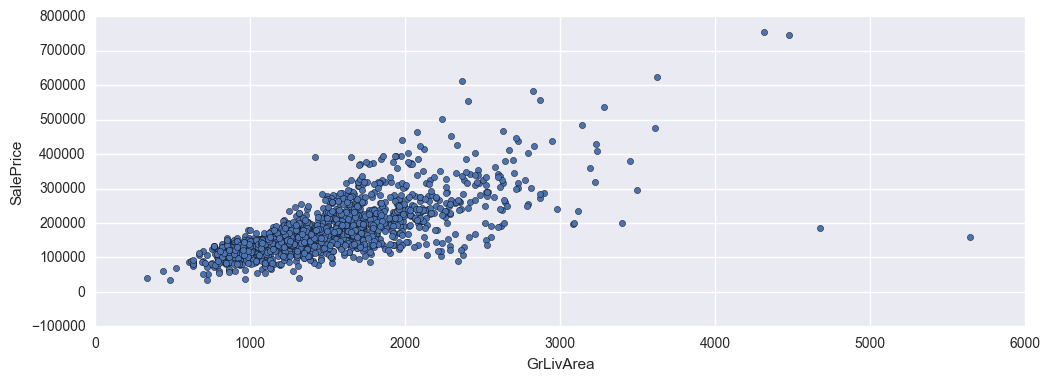

In [92]:
house_prices_train.plot(x='GrLivArea', y='SalePrice', kind='Scatter')

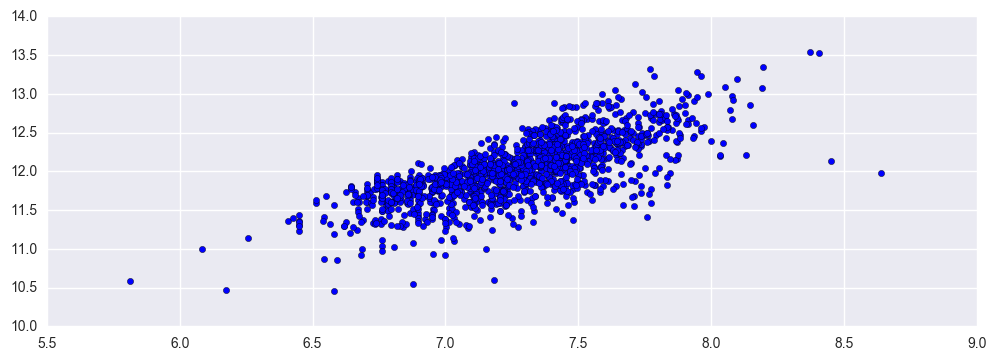

In [97]:
plt.scatter(x=train['GrLivArea'], y=output)

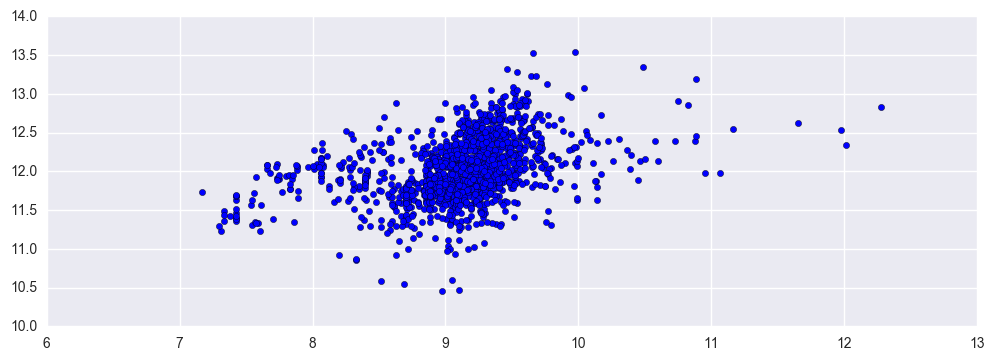

In [94]:
plt.scatter(x=train['LotArea'], y=output)

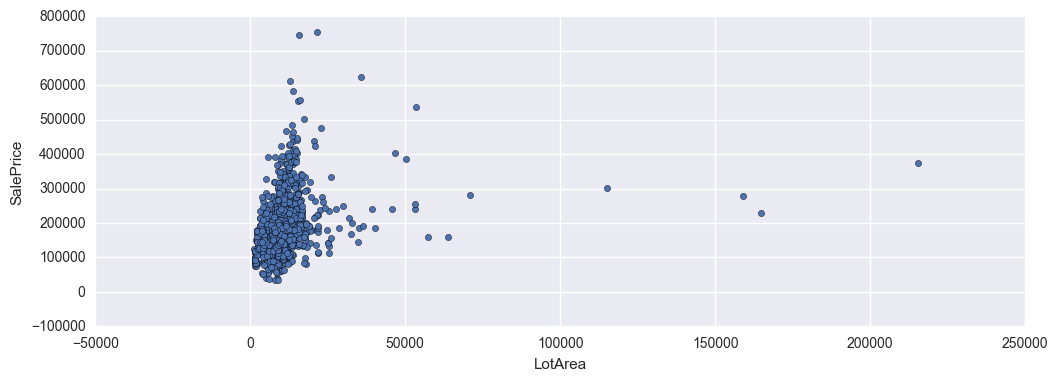

In [95]:
house_prices_train.plot(x='LotArea', y='SalePrice', kind='Scatter')

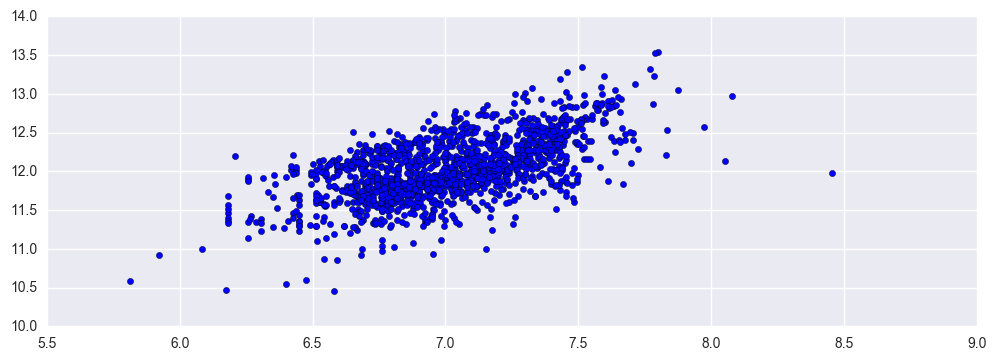

In [96]:
plt.scatter(x=train['1stFlrSF'], y=output)

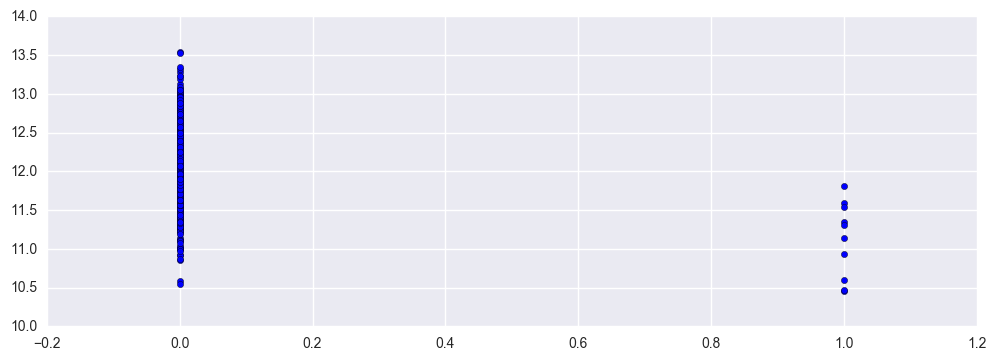

In [110]:
plt.scatter(x=train['MSZoning_C (all)'], y=output)

In [ ]:
from pandas.tools.plotting import scatter_matrix
#df = DataFrame(randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(train[:,0:10], alpha=0.2, figsize=(6, 6), diagonal='kde')